In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load similarity matrix from .pkt file
with open('combined_similarity.pkl', 'rb') as file:
    similarity = pickle.load(file)


In [22]:
print(similarity)

[[0.7906251  0.6849597  0.4896214  ... 0.7254156  0.72079504 0.5035075 ]
 [0.6849597  0.7906251  0.54992247 ... 0.7046709  0.6977031  0.5194045 ]
 [0.4896214  0.54992247 0.7906251  ... 0.48103663 0.47022295 0.46898282]
 ...
 [0.7254156  0.7046709  0.48103663 ... 0.7906251  0.7350286  0.53441787]
 [0.72079504 0.6977031  0.47022295 ... 0.7350286  0.7906253  0.50207984]
 [0.5035075  0.5194045  0.46898282 ... 0.53441787 0.50207984 0.7906251 ]]


In [23]:
print("Dimensi matriks similarity:", similarity.shape)

Dimensi matriks similarity: (8944, 8944)


In [24]:
print("Sebagian data matriks similarity:")
print(similarity[:10, :10])  # Cetak 10 baris pertama dan 10 kolom pertama


Sebagian data matriks similarity:
[[0.7906251  0.6849597  0.4896214  0.51125854 0.5937761  0.52436125
  0.6626748  0.6250347  0.6299614  0.72408104]
 [0.6849597  0.7906251  0.54992247 0.539961   0.625623   0.55508375
  0.62822527 0.59638584 0.61805737 0.6521458 ]
 [0.4896214  0.54992247 0.7906251  0.56733215 0.5178089  0.542758
  0.533198   0.4712968  0.50742286 0.47922745]
 [0.51125854 0.539961   0.56733215 0.7906253  0.52915317 0.5518689
  0.53729004 0.46793273 0.49468186 0.4861783 ]
 [0.5937761  0.625623   0.5178089  0.52915317 0.79062515 0.5770942
  0.597594   0.5763751  0.5214156  0.5937576 ]
 [0.52436125 0.55508375 0.542758   0.5518689  0.5770942  0.79062504
  0.5806653  0.55005705 0.5130603  0.54630536]
 [0.6626748  0.62822527 0.533198   0.53729004 0.597594   0.5806653
  0.7906252  0.6513016  0.63231826 0.6975575 ]
 [0.6250347  0.59638584 0.4712968  0.46793273 0.5763751  0.55005705
  0.6513016  0.79062515 0.5899159  0.670922  ]
 [0.6299614  0.61805737 0.50742286 0.49468186 0.521

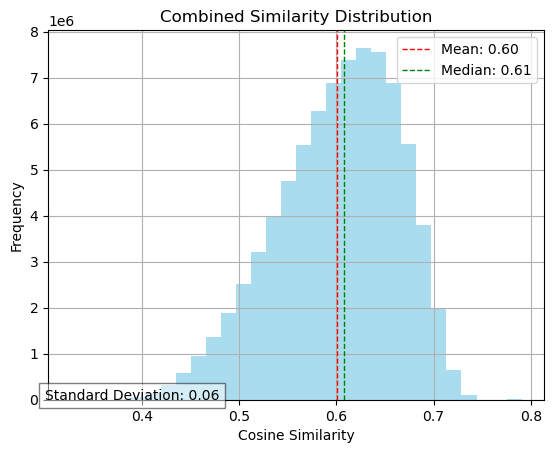

In [28]:
# Analisis deskriptif similarity
mean_similarity = np.mean(similarity)
median_similarity = np.median(similarity)
std_similarity = np.std(similarity)

# Meratakan matriks similarity menjadi satu dimensi
combined_similarity_flat = similarity.flatten()

# Menampilkan histogram distribusi nilai similarity
plt.hist(combined_similarity_flat, bins=30, alpha=0.7, color='skyblue')
plt.axvline(mean_similarity, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_similarity:.2f}')
plt.axvline(median_similarity, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_similarity:.2f}')
plt.text(0.3, 110, f'Standard Deviation: {std_similarity:.2f}', bbox=dict(facecolor='white', alpha=0.5))
plt.title('Combined Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import numpy as np
import pickle

# Fungsi untuk precision@k, recall@k, dan f1_score@k
def precision_at_k(similarity, k, threshold):
    precisions = []
    for sim in similarity:
        top_k_indices = np.argsort(sim)[::-1][:k]  # Indeks dari nilai tertinggi hingga ke-k
        top_k_similarity = sim[top_k_indices]
        relevant_items = (top_k_similarity >= threshold).sum()
        precision = relevant_items / k
        precisions.append(precision)
    return np.mean(precisions)

def recall_at_k(similarity, k, threshold):
    recalls = []
    for sim in similarity:
        top_k_indices = np.argsort(sim)[::-1][:k]
        top_k_similarity = sim[top_k_indices]
        relevant_items = (sim >= threshold).sum()
        recall = (top_k_similarity >= threshold).sum() / relevant_items if relevant_items else 0
        recalls.append(recall)
    return np.mean(recalls)

def f1_score_at_k(similarity, k, threshold):
    precisions = []
    recalls = []
    for sim in similarity:
        top_k_indices = np.argsort(sim)[::-1][:k]
        top_k_similarity = sim[top_k_indices]
        relevant_items = (sim >= threshold).sum()
        precision = (top_k_similarity >= threshold).sum() / k
        recall = (top_k_similarity >= threshold).sum() / relevant_items if relevant_items else 0
        precisions.append(precision)
        recalls.append(recall)
    precision = np.mean(precisions)
    recall = np.mean(recalls)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0
    return f1_score

# Parameter
k = 10
thresholds = [0.5, 0.6, 0.7, 0.8]

for threshold in thresholds:
    precision_k = precision_at_k(similarity, k, threshold)
    recall_k = recall_at_k(similarity, k, threshold)
    f1_k = f1_score_at_k(similarity, k, threshold)
    print(f"Threshold: {threshold}, Precision@{k}: {precision_k}, Recall@{k}: {recall_k}, F1-Score@{k}: {f1_k}")


Threshold: 0.5, Precision@10: 1.0, Recall@10: 0.001308711954991244, F1-Score@10: 0.002614002933093566
Threshold: 0.6, Precision@10: 0.9977750447227192, Recall@10: 0.01267698484558538, F1-Score@10: 0.025035882458778618
Threshold: 0.7, Precision@10: 0.7072227191413238, Recall@10: 0.4714032629982386, F1-Score@10: 0.565721615714781
Threshold: 0.8, Precision@10: 0.0, Recall@10: 0.0, F1-Score@10: 0


In [11]:
import numpy as np

# Menentukan threshold
threshold = 0.6

# Membuat true labels berdasarkan threshold
true_labels = (similarity >= threshold).astype(int)

print("True Labels:")
print(true_labels)

# Menyimpan matriks true_labels ke dalam file pickle
with open("true_labels_0.6.pkl", "wb") as f:
    pickle.dump(true_labels, f)

True Labels:
[[1 1 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]


In [39]:
import numpy as np
import pickle
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Definisikan fungsi P@K, R@K, dan F1-score
def precision_at_k(actual, predicted, k):
    predicted = predicted[:k]
    correct = len(set(predicted) & set(actual))
    return correct / k

def recall_at_k(actual, predicted, k):
    predicted = predicted[:k]
    correct = len(set(predicted) & set(actual))
    return correct / len(actual)

def f1_score_at_k(actual, predicted, k):
    p_at_k = precision_at_k(actual, predicted, k)
    r_at_k = recall_at_k(actual, predicted, k)
    if p_at_k + r_at_k > 0:
        return 2 * (p_at_k * r_at_k) / (p_at_k + r_at_k)
    else:
        return 0


In [40]:
# Konfigurasi MCCV
n_iterations = 5
kf = KFold(n_splits=n_iterations)

# Variabel untuk menyimpan hasil evaluasi
avg_precision = 0
avg_recall = 0
avg_f1_score = 0

# List untuk menyimpan metrik evaluasi dari setiap iterasi
precision_scores = []
recall_scores = []
f1_scores = []

# Iterasi MCCV
iteration = 0
for train_index, test_index in kf.split(similarity):
    iteration += 1
    print(f"Iteration {iteration}:")

    # Bagi data menjadi subset pelatihan dan pengujian
    train_similarity, test_similarity = similarity[train_index], similarity[test_index]
    test_true_labels = true_labels[test_index]
    
    # Hitung P@K, R@K, dan F1-score pada subset pengujian
    k = 50  # Misalnya, kita evaluasi pada 100 rekomendasi teratas
    p_at_k = 0
    r_at_k = 0
    f1_at_k = 0

    for i in range(len(test_similarity)):
        actual = np.where(test_true_labels[i] == 1)[0]  # Item-item yang benar-benar disukai oleh pengguna
        predicted = np.argsort(test_similarity[i])[::-1]  # Mengurutkan berdasarkan similarity secara descending
        p_at_k += precision_at_k(actual, predicted, k)
        r_at_k += recall_at_k(actual, predicted, k)
        f1_at_k += f1_score_at_k(actual, predicted, k)
    
    # Rata-rata hasil P@K, R@K, dan F1-score dari semua pengujian dalam MCCV iterasi ini
    avg_p_at_k = p_at_k / len(test_similarity)
    avg_r_at_k = r_at_k / len(test_similarity)
    avg_f1_at_k = f1_at_k / len(test_similarity)
    print(f"  Precision at K: {avg_p_at_k:.4f}")
    print(f"  Recall at K: {avg_r_at_k:.4f}")
    print(f"  F1-score at K: {avg_f1_at_k:.4f}")
    

    # Tambahkan ke total untuk rata-rata semua iterasi
    avg_precision += avg_p_at_k
    avg_recall += avg_r_at_k
    avg_f1_score += avg_f1_at_k
    
# Hitung rata-rata hasil evaluasi dari semua iterasi MCCV
avg_precision /= n_iterations
avg_recall /= n_iterations
avg_f1_score /= n_iterations

print("\nAverage Precision at K:", avg_precision)
print("Average Recall at K:", avg_recall)
print("Average F1-score at K:", avg_f1_score)

Iteration 1:
  Precision at K: 0.9934
  Recall at K: 0.0372
  F1-score at K: 0.0505
Iteration 2:
  Precision at K: 0.9934
  Recall at K: 0.0415
  F1-score at K: 0.0570
Iteration 3:
  Precision at K: 0.9947
  Recall at K: 0.0403
  F1-score at K: 0.0574
Iteration 4:
  Precision at K: 0.9937
  Recall at K: 0.0429
  F1-score at K: 0.0593
Iteration 5:
  Precision at K: 0.9933
  Recall at K: 0.0430
  F1-score at K: 0.0579

Average Precision at K: 0.993685113976413
Average Recall at K: 0.040979011994988254
Average F1-score at K: 0.05641798230822341
